In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess

In [5]:
ar_params = np.array([])
ma_params = np.array([0.9])

ar = np.r_[1,-ar_params]
ma = np.r_[1,ma_params]

array([1. , 0.9])

In [7]:
ma_process = ArmaProcess(ar,ma)

X = ma_process.generate_sample(nsample=5000)

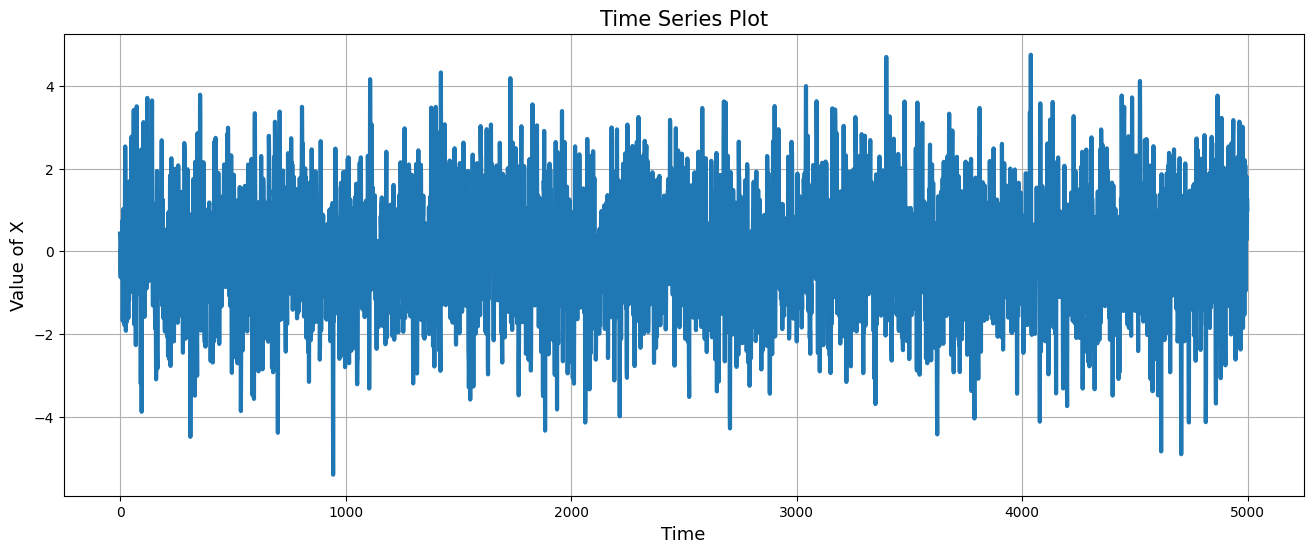

In [8]:
def plot_series(X): 
    """ Plots the time series data X.

    Args:
        X (np.array): Time-series data
    """

    fig = plt.figure(figsize=(16, 6))
    plt.plot(X, linewidth=3)
    plt.title('Time Series Plot', fontsize=15)
    plt.xlabel('Time', fontsize=13)
    plt.ylabel('Value of X', fontsize=13)
    plt.grid()
    plt.show()
    
plot_series(X)

In [9]:
def plot_graphs(X=None, ma_params=None, figsize=(10, 5), get_X=False):
    """ Plot ACF and PACF graphs
    
        Takes in time series data and plots the ACF and PACF graphs for the 
        series. When the time series is not provided, it generates the time 
        series using ma params and plots the graphs.

    Args:
        X (np.array): time series data
        ma_params (np.array): MA parameters - (theta1, theta2, ...)
        figsize (tuple): size for the figure

    """

    title = 'Autocorrelation for MA model ~ {}'.format(str(ma_params))

    # if X is None, create an ArmaProcess using the passed MA params and generate
    #  samples using the process
    if X is None:
        ma = np.r_[1, ma_params]
        ma_process = ArmaProcess(ar=[1], ma=ma)
        X = ma_process.generate_sample(nsample=10000)

    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(hspace=0.45)

    # ACF plot
    ax = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(X, ax=ax)
    ax.set_title(title, fontsize=14)

    # PACF plot
    ax = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(X, ax=ax)
    ax.set_title('Partial ' + title, fontsize=14)

    plt.show()
    if get_X:
        return X

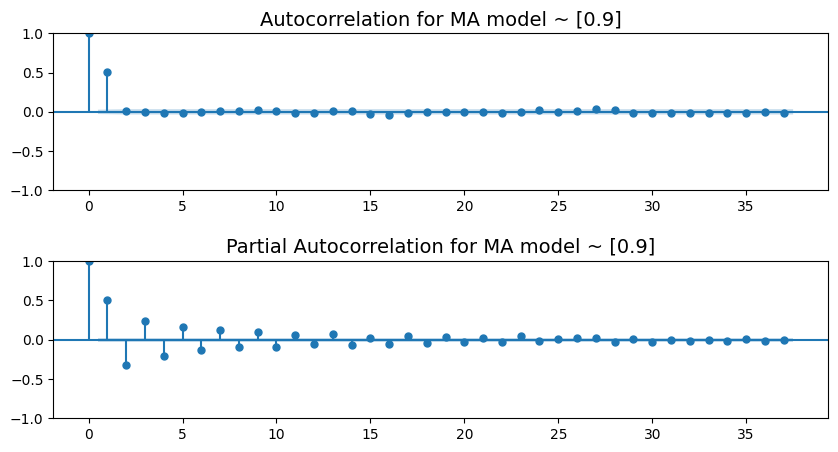

In [10]:
plot_graphs(X,ma_params=ma_params)

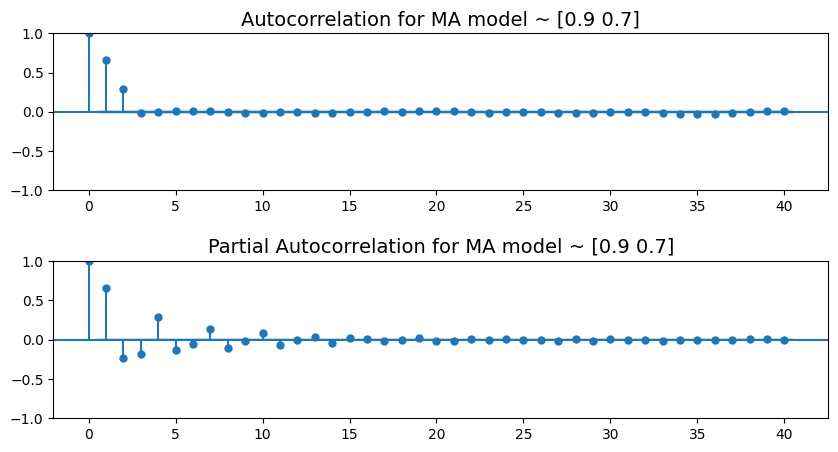

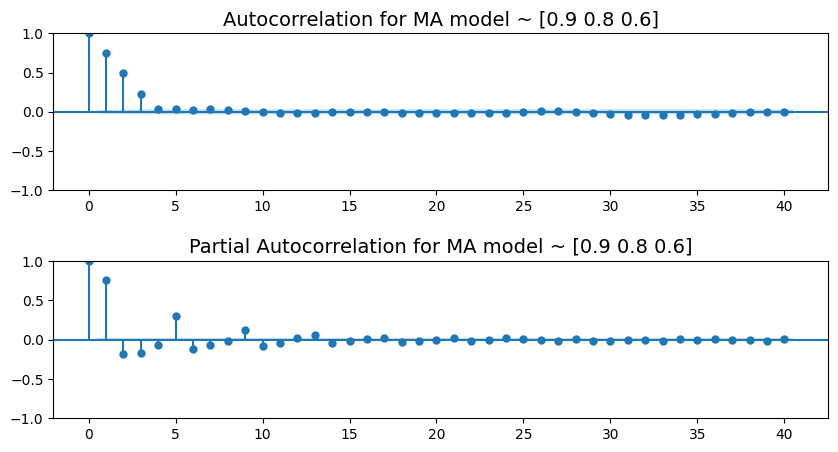

In [12]:
# ma params for example models
ma_params1 = np.array([0.9, 0.7]) 
ma_params2 = np.array([0.9, 0.8, 0.6]) 

# plotting ACF and PACF graphs 
plot_graphs(ma_params=ma_params1)
X_3 = plot_graphs(ma_params=ma_params2, get_X = True)

In [28]:
ar_order = 0 # fitting dataset from MA(3) process so order is 0 for ar_part
ma_order = 3 # fitting dataset from MA(3) process so order is 3 for ma_part
order = (ar_order, 1, ma_order)

# create an instance of `ARMA` model of the required order with the data and the 
# order and use the `fit` method to fit the model on the data
ma_model = sm.tsa.arima.model.ARIMA(X_3, order=order).fit()
# ma_model = sm.tsa.arima.model.ARMA(X_3, order=order).fit(trend='nc', disp=-1)

ma_model.params

array([-0.29210078, -0.09935794, -0.3751805 ,  1.34832204])